# tf.image进行图像增强

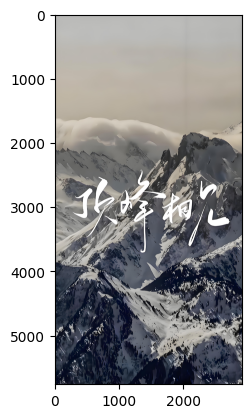

In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
# 读取图像并显示
Insp = plt.imread('./Inspiration.jpg')
plt.imshow(Insp)

## 1 翻转与裁剪
### 1.1左右翻转

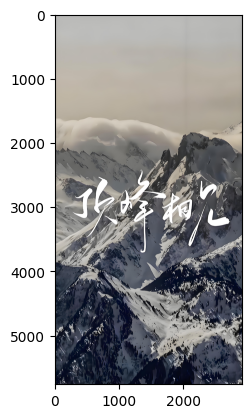

In [36]:
Insp1 = tf.image.random_flip_left_right(Insp)
plt.imshow(Insp1)

### 1.2上下翻转

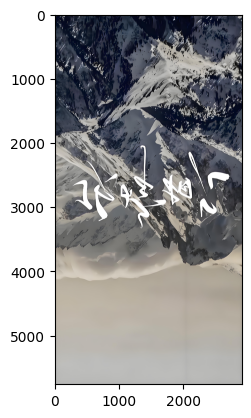

In [37]:
Insp2 = tf.image.random_flip_up_down(Insp)
plt.imshow(Insp2)

### 1.3随机裁剪

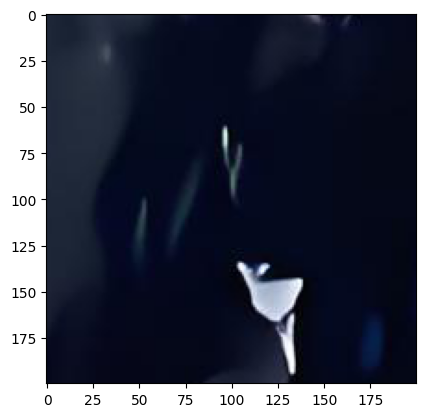

In [38]:
# 随即裁剪
Insp3 = tf.image.random_crop(Insp, (200, 200, 3))
plt.imshow(Insp3)

## 2 颜色变换
### 2.1亮度

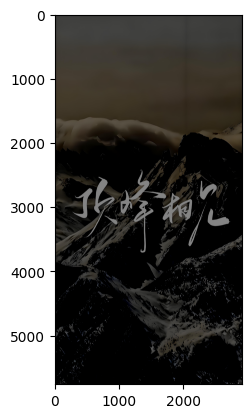

In [39]:
Insp4 = tf.image.random_brightness(Insp, 0.5)
plt.imshow(Insp4)

### 2.2色调

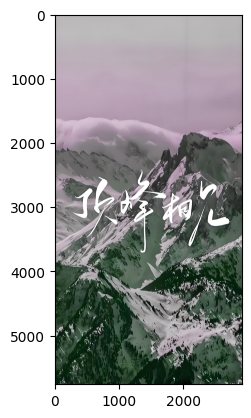

In [40]:
Insp5 = tf.image.random_hue(Insp, 0.5)
plt.imshow(Insp5)

# 使用ImageDataGenerator()进行图像增强

In [47]:
from tensorflow.keras.datasets import mnist

In [48]:
# 获取数据集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [49]:
x_train.shape

(60000, 28, 28)

In [50]:
x_test.shape

(10000, 28, 28)

In [51]:
# ( ,28,28)--->( ,28,28,1) 将本来缺少的通道维度加上
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [52]:
# 实例化
datagen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip = True)

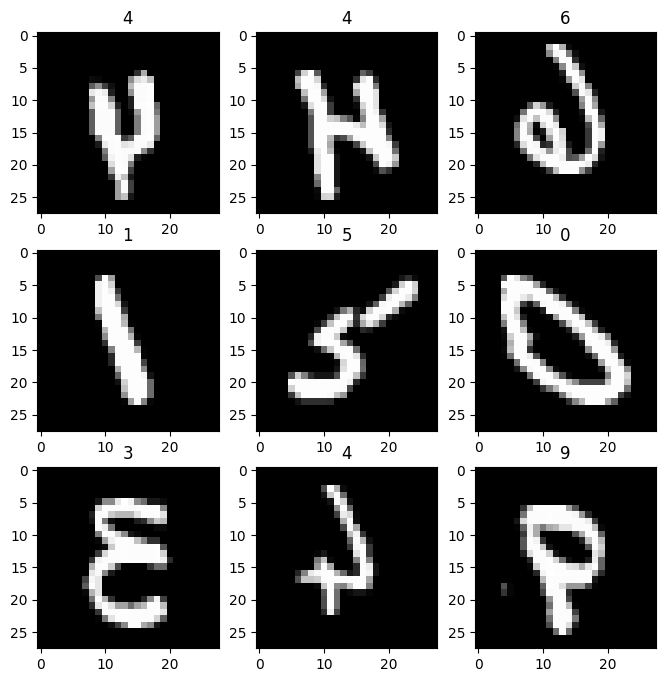

In [54]:
for x, y in datagen.flow(x_train, y_train, batch_size=9):
    plt.figure(figsize=(8, 8))
    for i in range(0, 9):
        plt.subplot(330+1+i) # # 创建3行3列的子图（330表示3行3列起始索引0）
        plt.imshow(x[i].reshape(28, 28),cmap = 'gray') # # 显示图像（转回28×28维度，灰度模式）
        plt.title(y[i]) # # 显示图像对应的标签（真实数字）
    plt.show()
    break